In [1]:
# !pip install ipyfilechooser

# show the used python env
import sys
sys.executable

'C:\\Users\\m1srh\\Miniconda3\\envs\\napari_czmodel\\python.exe'

In [2]:
# import the required libraries
from czimetadata_tools import pylibczirw_metadata as czimd
from czimetadata_tools import pylibczirw_tools as czird
from czimetadata_tools import misc, napari_tools
from ipyfilechooser import FileChooser
from IPython.display import display, HTML
import napari

In [3]:
defaultdir = r"D:\Testdata_Zeiss\CZI_Testfiles"
fc = FileChooser(defaultdir)
fc.filter_pattern = '*.czi'
display(fc)

FileChooser(path='D:\Testdata_Zeiss\CZI_Testfiles', filename='', title='', show_hidden=False, select_desc='Sel…

In [4]:
# Print the selected path, filename, or both
print(fc.selected_path)
print(fc.selected_filename)
print(fc.selected)

D:\Testdata_Zeiss\CZI_Testfiles
CellDivision_T=3_Z=5_CH=2_X=240_Y=170.czi
D:\Testdata_Zeiss\CZI_Testfiles\CellDivision_T=3_Z=5_CH=2_X=240_Y=170.czi


In [5]:
# get only specific metadata
czi_dimensions = czimd.CziDimensions(fc.selected)
print("SizeS: ", czi_dimensions.SizeS)
print("SizeT: ", czi_dimensions.SizeT)
print("SizeZ: ", czi_dimensions.SizeZ)
print("SizeC: ", czi_dimensions.SizeC)
print("SizeY: ", czi_dimensions.SizeY)
print("SizeX: ", czi_dimensions.SizeX)

SizeS:  None
SizeT:  3
SizeZ:  5
SizeC:  2
SizeY:  170
SizeX:  240


In [6]:
# and get more info
czi_scaling = czimd.CziScaling(fc.selected)
czi_channels = czimd.CziChannelInfo(fc.selected)
czi_bbox = czimd.CziBoundingBox(fc.selected)
czi_info = czimd.CziInfo(fc.selected)
czi_objectives = czimd.CziObjectives(fc.selected)
czi_detectors = czimd.CziDetector(fc.selected)
czi_microscope = czimd.CziMicroscope(fc.selected)
czi_sample = czimd.CziSampleInfo(fc.selected)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No Scene or Well information found.


In [7]:
# get the complete metadata at once as one big class
mdata = czimd.CziMetadata(fc.selected)

# get the CZI metadata dictionary directly from filename
mdict = czimd.create_mdict_red(mdata, sort=False)

# convert metadata dictionary to a pandas dataframe
mdframe = misc.md2dataframe(mdict)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(mdframe.to_html()))

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No Scene or Well information found.


,Parameter,Value
0,Directory,D:\Testdata_Zeiss\CZI_Testfiles
1,Filename,CellDivision_T=3_Z=5_CH=2_X=240_Y=170.czi
2,AcqDate,2016-02-12T09:41:02.4915604Z
3,SizeX,240
4,SizeY,170
5,SizeZ,5
6,SizeC,2
7,SizeT,3
8,SizeS,None
9,SizeB,1


In [8]:
# write XML to disk
xmlfile = czimd.writexml(fc.selected)
print("XML File written to:", xmlfile)

XML File written to: D:\Testdata_Zeiss\CZI_Testfiles\CellDivision_T=3_Z=5_CH=2_X=240_Y=170_CZI_MetaData.xml


In [9]:
# get the planetable for the CZI file
pt, csvfile = misc.get_planetable(fc.selected,
                                  norm_time=True,
                                  savetable=True,
                                  separator=',',
                                  index=True)

# and display it nicely as a HTML inside the jupyter notebook
display(HTML(pt.to_html()))
print("PlaneTable CSV File written to:", csvfile)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No Scene or Well information found.


  0%|          | 0/30 [00:00<?, ?it/s]

,Subblock,Scene,Tile,T,Z,C,X[micron],Y[micron],Z[micron],Time[s],xstart,ystart,width,height
0,0,0,0,0,0,0,16977.153,18621.489,1114.49,0.0,0,0,240,170
1,1,0,0,0,0,1,16977.153,18621.489,1114.49,0.328019,0,0,240,170
2,2,0,0,0,1,0,16977.153,18621.489,1114.81,0.894051,0,0,240,170
3,3,0,0,0,1,1,16977.153,18621.489,1114.81,1.22007,0,0,240,170
4,4,0,0,0,2,0,16977.153,18621.489,1115.13,1.792102,0,0,240,170
5,5,0,0,0,2,1,16977.153,18621.489,1115.13,2.117121,0,0,240,170
6,6,0,0,0,3,0,16977.153,18621.489,1115.45,2.681153,0,0,240,170
7,7,0,0,0,3,1,16977.153,18621.489,1115.45,3.007172,0,0,240,170
8,8,0,0,0,4,0,16977.153,18621.489,1115.77,3.586205,0,0,240,170
9,9,0,0,0,4,1,16977.153,18621.489,1115.77,3.941225,0,0,240,170


PlaneTable CSV File written to: D:\Testdata_Zeiss\CZI_Testfiles\CellDivision_T=3_Z=5_CH=2_X=240_Y=170_planetable.csv


In [10]:
# return array with dimension order STZCYXA
mdarray, dimstring = czird.read_mdarray(fc.selected)

# remove A dimension do display the array inside Napari
dim_order, dim_index, dim_valid = czimd.CziMetadata.get_dimorder(dimstring)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No Scene or Well information found.


  0%|          | 0/30 [00:00<?, ?it/s]

In [12]:
# show array inside napari viewer
viewer = napari.Viewer()
layers = napari_tools.show(viewer, mdarray, mdata,
                           dim_order=dim_order,
                           blending="additive",
                           contrast='napari_auto',
                           gamma=0.85,
                           add_mdtable=True,
                           name_sliders=True)

C:\Users\m1srh\Miniconda3\envs\napari_czmodel\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


Adding Channel  : LED555
Shape Channel   : 0 (1, 3, 5, 1, 170, 240)
Scaling Factors : [1.0, 1.0, 3.533, 1.0, 1.0, 1.0]
Adding Channel  : LED470
Shape Channel   : 1 (1, 3, 5, 1, 170, 240)
Scaling Factors : [1.0, 1.0, 3.533, 1.0, 1.0, 1.0]
Rename Sliders based on the Dimension String ....


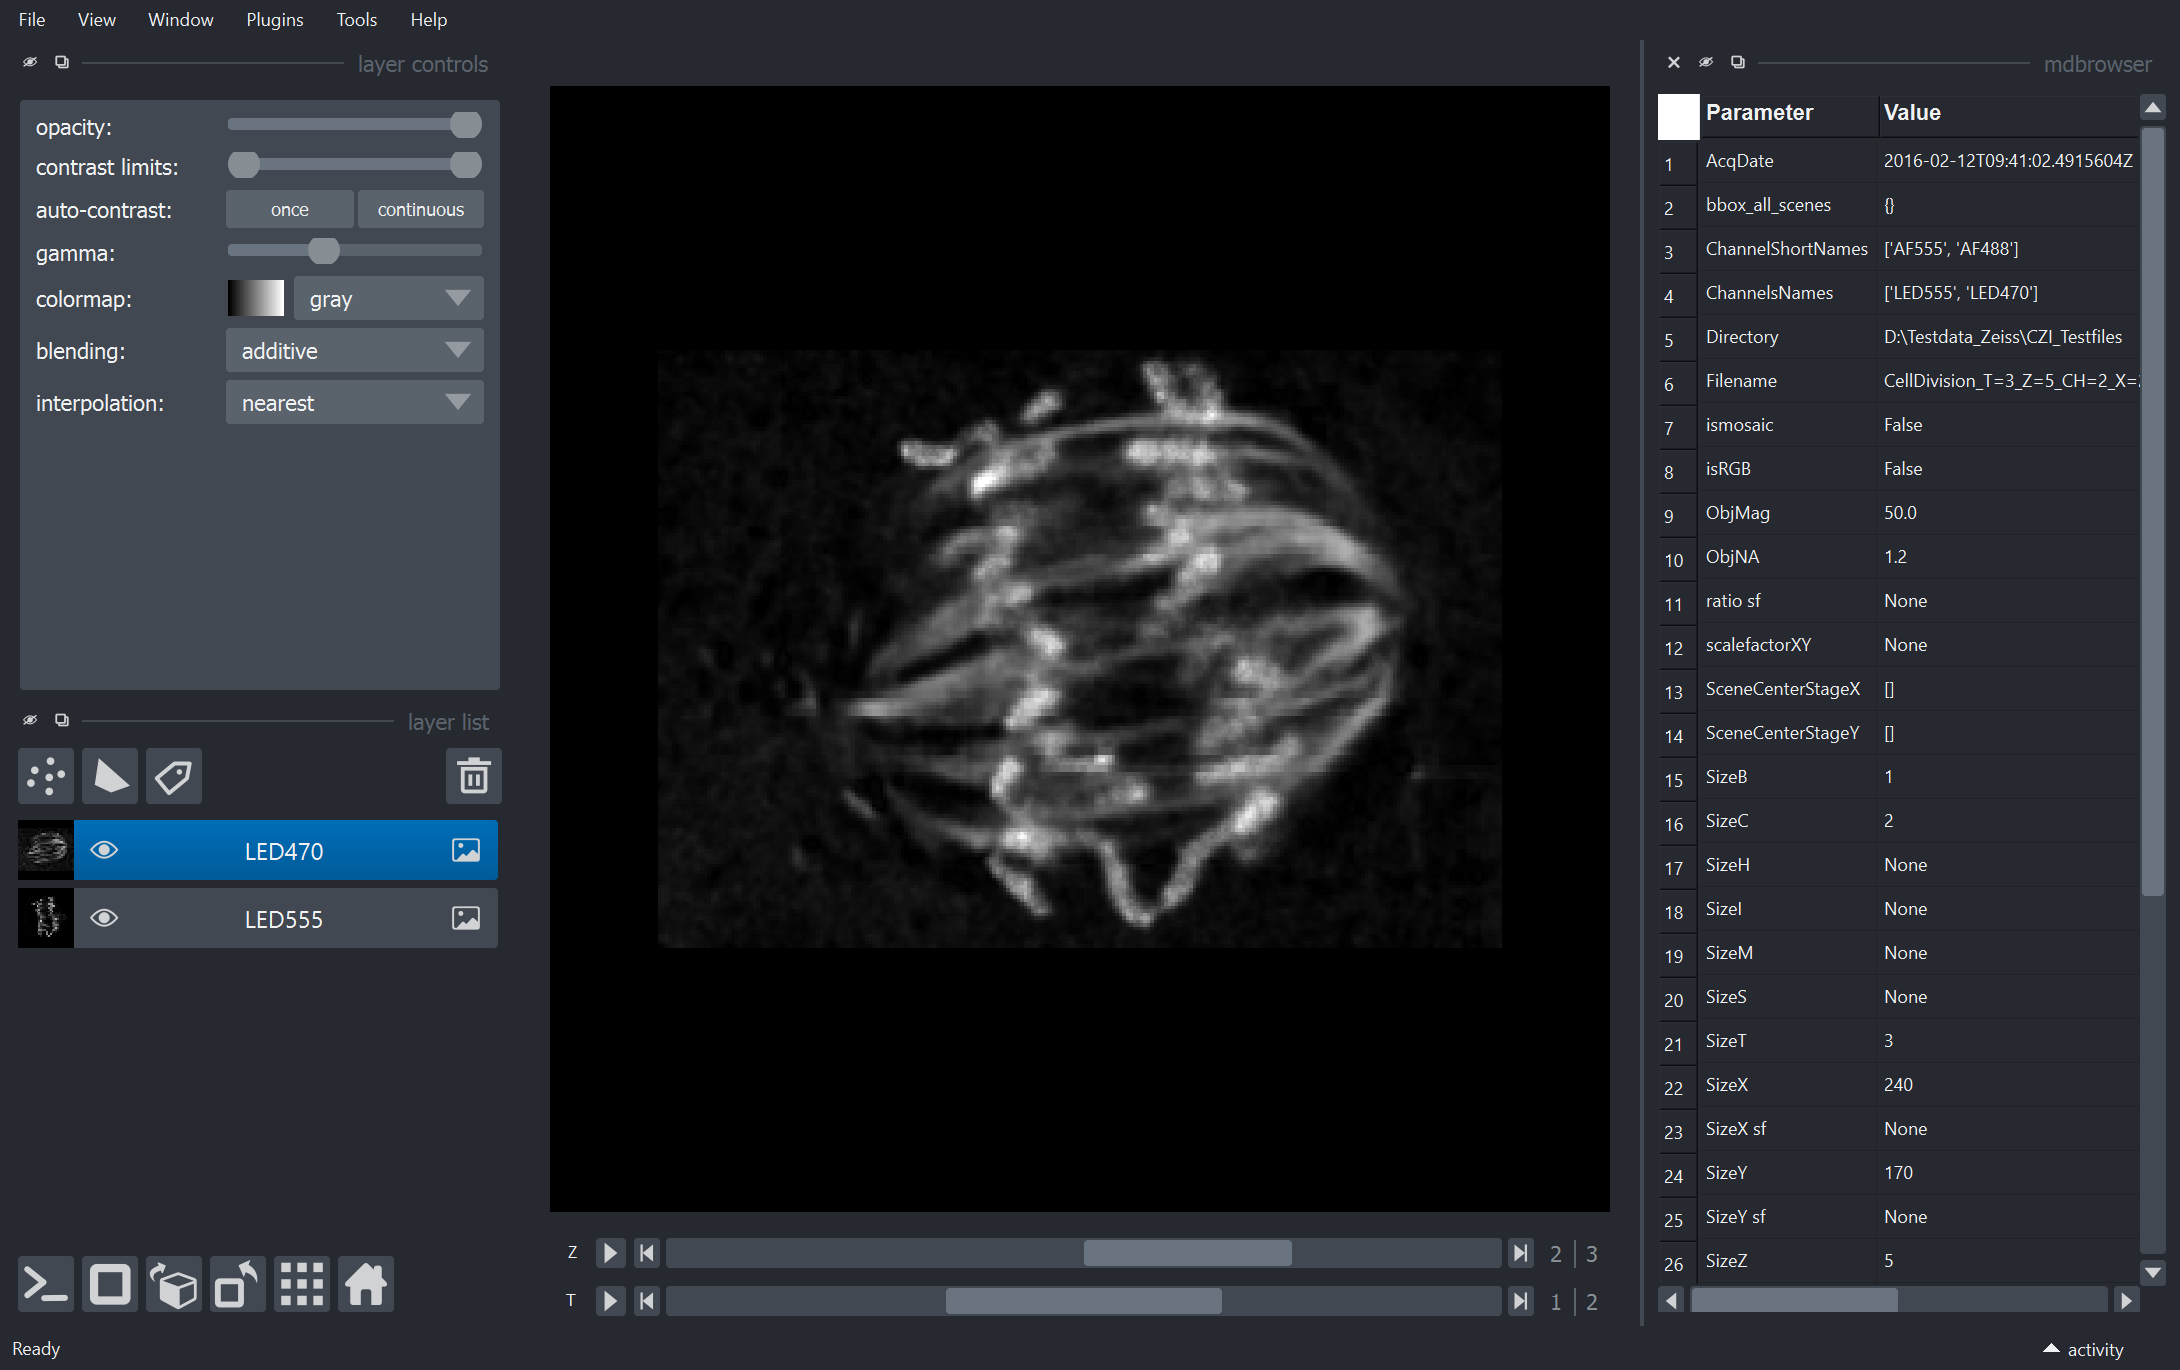

In [13]:
napari.utils.nbscreenshot(viewer)